# DTSA 5509 - Final Project : Yelp Reviews, Real or Fake?

## Project Topic

This project will explore building a supervised machine learning model to detect whether a restaturants review posted on Yelp is either fake or real. This problem will be a binary classification "real" or "fake" problem. The model will be trained on the Yelp public dataset that contains labeled examples of fake and real reviews. 

The goal is to develop an accurate model that can help businesses be able to identify fake reviews that are harming their business and reputation. I want to achieve this problem by using some text preprocessing techniques in the dataset to train a Support Vector Machine (SVM). This project is important because fake reviews can be misleading to other new potential customers and can harm the reputation of a business. Therefore, being able to have a tool like this will allow the reviews to be identified accurately and will help to maintain the credibility of reviews which will help businesses thrive.

## Data Description

I will be using the Yelp Dataset that is publicly available here: https://www.yelp.com/dataset

The data contains 1.2 million tips by 1.6 million users. And 1.2 million business attributes. Therefore, it is a large dataset. Now let's explore some other things we can learn about our data. Due to the large dataset and memory issues, will work with reduced data for this project.

In [2]:
import pandas as pd

#### The Yelp Business file contains information about businesses on Yelp, including the business ID, name, address, city, state, postal code, latitude, longitude, star rating, review count, and other attributes. The file has 150346 rows (i.e., businesses) and 14 columns (i.e., features). The file size is 118863795 bytes. Most of the features are categorical.

In [ ]:
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)


In [ ]:
print(f"Number of rows: {business_df.shape[0]}")
print(f"Number of columns: {business_df.shape[1]}")

In [ ]:
print(business_df.head(10))

### The check in file contains information about check-ins at businesses on Yelp, including the business ID, date, and number of check-ins. The file has 131930 rows (i.e., check-ins) and 2 columns (i.e., features). The file size is 286958945 bytes. The features are all categorical.

In [ ]:
check_in_df = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

In [ ]:
print(f"Number of rows: {check_in_df.shape[0]}")
print(f"Number of columns: {check_in_df.shape[1]}")

In [ ]:
print(check_in_df.head(10))

Reviews is very large dataset and my computer runs out of memory loading the file. So I will be using 100,000 rows of this dataset

### The Reviews Yelp file contains information about reviews of businesses on Yelp, including the review ID, user ID, business ID, star rating, date, and text of the review. The file has 100000 rows (i.e., reviews) and 9 columns (i.e., features). The file size is 5341868833 bytes. The text of the review is a long string, while the other features are either categorical or numeric.

In [34]:
reviews_df = pd.read_json('yelp_academic_dataset_review.json', lines=True, nrows=1000000)

In [38]:
# Count the number of reviews for each star rating
star_counts = reviews_df['stars'].value_counts()

# Determine the minimum number of reviews for any star rating
min_star_count = star_counts.min()

star_counts

5    458612
4    221897
1    138625
3    102954
2     77912
Name: stars, dtype: int64

In [39]:
reviews_df = pd.concat([
    reviews_df[reviews_df['stars'] == 1].sample(1300, replace = True),
    reviews_df[reviews_df['stars'] == 2].sample(1200, replace = True),
    reviews_df[reviews_df['stars'] == 3].sample(1000, replace = True),
    reviews_df[reviews_df['stars'] == 4].sample(1100, replace = True),
    reviews_df[reviews_df['stars'] == 5].sample(1000, replace = True)
])

In [40]:
print(f"Number of rows: {reviews_df.shape[0]}")
print(f"Number of columns: {reviews_df.shape[1]}")

Number of rows: 5600
Number of columns: 9


In [41]:
print(reviews_df.head(10))

                     review_id                 user_id  \
33750   POPXbZshy4elva4PE6kxpA  C-wzlV1-xCprsvO-w4bOBA   
938493  pGkA78ym0trmqW2VtMOk_Q  _yrcpls_L6meQcI31MV58A   
190068  UwDRF8P_UHeJz57oBkT4xg  NAXKMADoCg9jrfSZpdBSzQ   
475569  qKTkDi9fE9i_FGwpJ5xjNw  LhAXKz5_0BNpkMcvZWS0sw   
459271  vh_AjdEojZGp7WWd4A8z4w  WMGv9-aDe15M13UpXHIOGw   
886547  ONdvK4mZMCi2kJ6ZUKC-cg  Xw7ZjaGfr0WNVt6s_5KZfA   
909187  1VP4Z2Z-08iVsWbjkZbHgg  Pv-Pi8WEkMrvo8-Bzn2ELg   
51175   lCsAisddSFUyerRxOLDZ_A  hk5843hXGL72mJf95vwGnQ   
614302  _sj_33Ae47Akrvi3_s45Rw  TV2GjGimjjbpOiP03vXK1Q   
738894  Se5EHne18csABLckKkS4Aw  xHTC8GTaFOhjALEqWAWGqg   

                   business_id  stars  useful  funny  cool  \
33750   rQCTWNMzIZTfqWEAjxDpKQ      1       0      1     0   
938493  bbzD8rZl3i-NTzernYkxig      1       1      1     0   
190068  iGFGMP5x2PSbAZJudk186Q      1       5      0     1   
475569  fI8kWao4ejLDDGgWNxKiHw      1       2      0     0   
459271  XlLogD78dDkqnXFlmwhVhA      1       3      

### The Tip Yelp file contains tips (i.e., short comments) from Yelp users about businesses. Including the user ID, business ID, date, and text of the tip. The file has 908915 rows (i.e., tips) and 5 columns (i.e., features). The file size is 180604475 bytes. The text of the tip is a long string, while the other features are either categorical or date/time.

In [ ]:
tip_df = pd.read_json('yelp_academic_dataset_tip.json', lines=True)

In [ ]:
print(f"Number of rows: {tip_df.shape[0]}")
print(f"Number of columns: {tip_df.shape[1]}")

In [ ]:
print(tip_df.head(10))

### The Yelp User file contains information about Yelp users, including the user ID, name, review count, yelping since date, friends, average star rating, and other attributes. The file has 10000 rows (i.e., users) and 22 columns (i.e., features). The file size is 3363329011 bytes. Majority of the features are either categorical or text with a few numeric features like review count and average star rating.

In [ ]:
user_df = pd.read_json('yelp_academic_dataset_user.json', lines=True, nrows=10000)

In [ ]:
print(f"Number of rows: {user_df.shape[0]}")
print(f"Number of columns: {user_df.shape[1]}")

In [ ]:
print(user_df.head(10))

In [ ]:
import os
business_filesize = os.path.getsize('yelp_academic_dataset_business.json')
review_filesize = os.path.getsize('yelp_academic_dataset_review.json')
user_filesize = os.path.getsize('yelp_academic_dataset_user.json')
checkin_filesize = os.path.getsize('yelp_academic_dataset_checkin.json')
tip_filesize = os.path.getsize('yelp_academic_dataset_tip.json')

print(f"Business file size: {business_filesize} bytes")
print(f"Review file size: {review_filesize} bytes")
print(f"User file size: {user_filesize} bytes")
print(f"Checkin file size: {checkin_filesize} bytes")
print(f"Tip file size: {tip_filesize} bytes")


## Data Cleaning And EDA

Want to focus on the Reviews Dataset to work on the classification problem of either 'fake' or 'real' reviews.

First we will Drop an irrelevant columns from our data.Then drop any rows with missing values or duplicate rows.

In [42]:
# Drop irrelevant columns 
reviews_df = reviews_df[['stars', 'text']]

# Drop rows with missing values
reviews_df.dropna(inplace=True)

# Drop duplicate rows
reviews_df.drop_duplicates(subset=['text', 'stars'], inplace=True)


Create a histogram visualization to look at the distribution of star ratings. Below we see that the majority of the star ratings are positive, usually (4 or 5). 

Looks like I will need to balance the classes to handle the imbalance of the ratings.

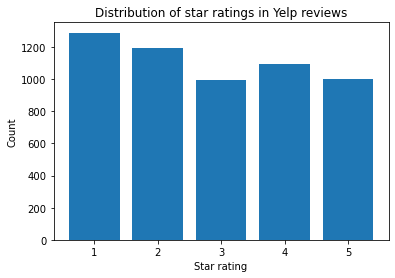

In [43]:
import matplotlib.pyplot as plt

# Create a histogram of the star ratings
plt.hist(reviews_df['stars'], bins=5, range=(0.5, 5.5), rwidth=0.8)
plt.xlabel('Star rating')
plt.ylabel('Count')
plt.title('Distribution of star ratings in Yelp reviews')
plt.show()


Review Text Length

From the distribution below we can see that the majority of the review text lengths are on the shorter side. 

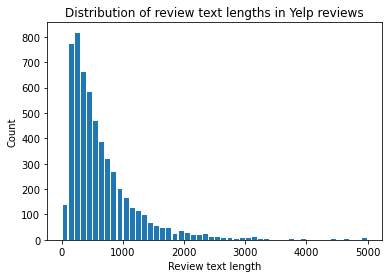

In [44]:
# Calculate the length of each review text
review_lengths = reviews_df['text'].apply(lambda x: len(x))

# Create a histogram of the review text length
plt.hist(review_lengths, bins=50, range=(0, 5000), rwidth=0.8)
plt.xlabel('Review text length')
plt.ylabel('Count')
plt.title('Distribution of review text lengths in Yelp reviews')
plt.show()


Look for missing values in columns

Looking at the plot below we can confirm that there are no missing values in the stars and text columns.

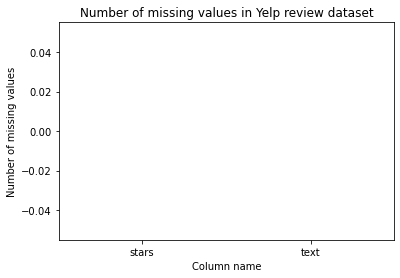

In [45]:
# Count the number of missing values in each column
missing_values = reviews_df.isnull().sum()

# Create a bar chart of the missing values
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Column name')
plt.ylabel('Number of missing values')
plt.title('Number of missing values in Yelp review dataset')
plt.show()


## Modeling Analysis and Results

### Text preprocessing and Feature engineering on Reviews

In [46]:
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Define a function to preprocess the review text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Perform word-level tokenization
    tokens = text.split()
    # Perform character-level tokenization
    char_tokens = [list(token) for token in tokens]
    # Combine word-level and character-level tokens
    tokens = tokens + [''.join(char_token) for char_token in char_tokens]
    # Create n-grams from the tokens
    ngram_tokens = []
    for n in range(1, 4):
        ngram_tokens += [tokens[i:i+n] for i in range(len(tokens)-n+1)]
    return ' '.join([' '.join(ngram) for ngram in ngram_tokens])


### Next Apply the preprocessing function built above on the Yelp Reviews Data and Encode Ratings

In [47]:
# Apply the preprocessing function to the review text
reviews_df['text'] = reviews_df['text'].apply(preprocess_text)

# Encode the star ratings as 0 (fake) or 1 (real)
label_encoder = LabelEncoder()
reviews_df['stars'] = label_encoder.fit_transform(reviews_df['stars'])

### Create the training and test sets and use stratified sampling due to the imbalance of our reviews data we found when exploring our data

In [48]:
# Split the dataset into training and testing sets
#using stratified sampling due to the imbalance of our reviews
X_train, X_test, y_train, y_test = train_test_split(reviews_df['text'], reviews_df['stars'], test_size=0.2, stratify=reviews_df['stars'], random_state=42)

# Define a vectorizer to create a bag-of-words representation of the text
vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=5000, stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)

# Define a transformer to calculate the term frequency–inverse document frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Train SVC Linear Model and Test it using our testing set

In [49]:
# Train a LinearSVC model on the training set
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

# Test the model on the testing set
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

### Evaluate the results from our model and see how it did or if any changes need to be done

In [50]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', confusion)


Accuracy: 0.48473967684021546
Confusion matrix: [[177  59  14   4   4]
 [ 77  86  51  16   9]
 [ 23  59  56  40  20]
 [ 11  30  36  97  45]
 [  7  10   7  52 124]]


In [51]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.60      0.69      0.64       258
           1       0.35      0.36      0.36       239
           2       0.34      0.28      0.31       198
           3       0.46      0.44      0.45       219
           4       0.61      0.62      0.62       200

    accuracy                           0.48      1114
   macro avg       0.47      0.48      0.48      1114
weighted avg       0.48      0.48      0.48      1114



The above shows some bias towards predicting well for star ratings of 0 or 4 since those are the majority of the ratings in the review dataset. This makes me wonder what I have always thought, which is that I feel most people tend to leave a rating/review when they had an absolutely amazing experience or a horrible one. But I will be exploring some SVM Modeling below.

## SVM Modeling

Defin the target and features for the Model

In [53]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Define the target variable
threshold = 3
reviews_df['is_fake'] = np.where(reviews_df['stars'] <= threshold, 1, 0)
target = reviews_df['is_fake']

# Define the features
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=10000)
features = vectorizer.fit_transform(reviews_df['text'])

Splitting our data into their respective training and testing data sets to use later.

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Now doing some balancing for our classes as mentioned before, this was an issue we found in our data. So I'll be using oversampling to do some balancing.

In [55]:
#Balance the classes using oversampling
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

Next will do hyperparameter tuning and some Grid Search to find the best hyperparameters

In [56]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4]}

# Perform grid search cross-validation to find the best hyperparameters
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}


Then will train the SVM classifier on the training set we split and created.

In [57]:
# Train the classifier on the training data using the best hyperparameters
svm_classifier = SVC(**grid_search.best_params_)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='poly')

Will be using the testing data now to make some predictions

In [58]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

Lastly, will evaluate out SVM classifier and see how it did in terms of accuracy.

In [59]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', confusion)

Accuracy: 0.8177737881508079
Confusion Matrix:  [[  0 202]
 [  1 911]]


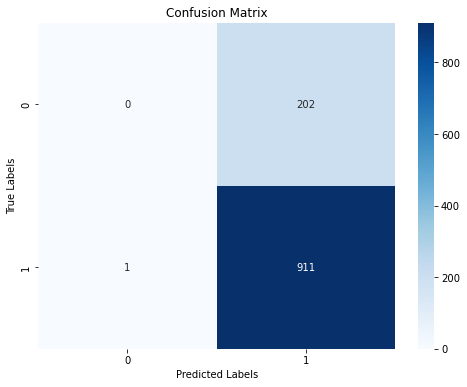

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()


In [66]:
from sklearn.metrics import f1_score
y_true_real = y_test[y_test == 1]
y_pred_real = y_pred[y_test == 1]

# Compute the F1-score of fake
f1_real = f1_score(y_true_real, y_pred_real)

print('F1-score:', f1_real)

F1-score: 0.9994514536478333


## Conclusion/Discussion

From the results above, using SVM modeling the model greatly improved from a Linear SVC model with an accuracy of 0.48 to an SVM classifier model with an accuracy of 0.82. Using grid search to find the best hyperparameters enabled the model to perform better in terms of accuracy compared to the previous model created. As for the F1 score we get a score of about 0.999.

For this project I explored a binary classifying Yelp Reviews as 'real' or 'fake'. First I did some data cleaning and exploration and then some preprocessing. I experimented with different algorithms, including linear svc, gradient boosting, SVM, and grid search cross validation to tune the hyperparameters for the final SVM classifier. The results show that I was able to achieve a relatively high accuracy of 82% on a balanced data set with about 1,000 reviews per star. However, there could be some further improvements such as experimenting with different text preprocessing techniques. There were also some limitations such as computer memory issues and not being able to utilize the full dataset in the millions. I think being able to use the full dataset would've resulted in better scores but even with the reduced data I was still able to reach a reasonable accuracy. 

In conclusion, while I was able to reach a relatively high accuracy on the Yelp dataset using SVM classifier there still needs to be more work on improving the model to identify 'fake' reviews. I hope I was able to highlight the improtance of this project in experimenting with different techniques for handling large data and imbalance along with some feature engineering to get proper results.